<>:7: SyntaxWarning: invalid escape sequence '\I'
<>:7: SyntaxWarning: invalid escape sequence '\I'
C:\Users\fofoy\AppData\Local\Temp\ipykernel_16176\531626170.py:7: SyntaxWarning: invalid escape sequence '\I'
  jalisco_df = gpd.read_file('D:\ITESO\sem2\prog_analisis\proshecto\limites_municipales\LimiteMunicipal_MGJ2012_modificadoDecreto26837.shp')


             municipio total 5 estrella 4 estrella 3 estrella 2 estrella  \
0              bolanos    28          0          0          0          0   
1          chimaltitan     8          0          0          0          0   
2             colotlan   138          0         62          0          0   
3             huejucar    41          0          0          0          0   
4  huejuquilla el alto    77          0          0         60          0   

  1 estrella sin catego   año region                        geometry  
0          8         20  2013  norte  POINT (630487.489 2418741.766)  
1          0          8  2013  norte  POINT (641908.744 2419381.145)  
2         76          0  2013  norte   POINT (687716.027 2439943.44)  
3         41          0  2013  norte  POINT (669897.399 2472169.574)  
4          0         17  2013  norte   POINT (614103.465 2507056.79)  


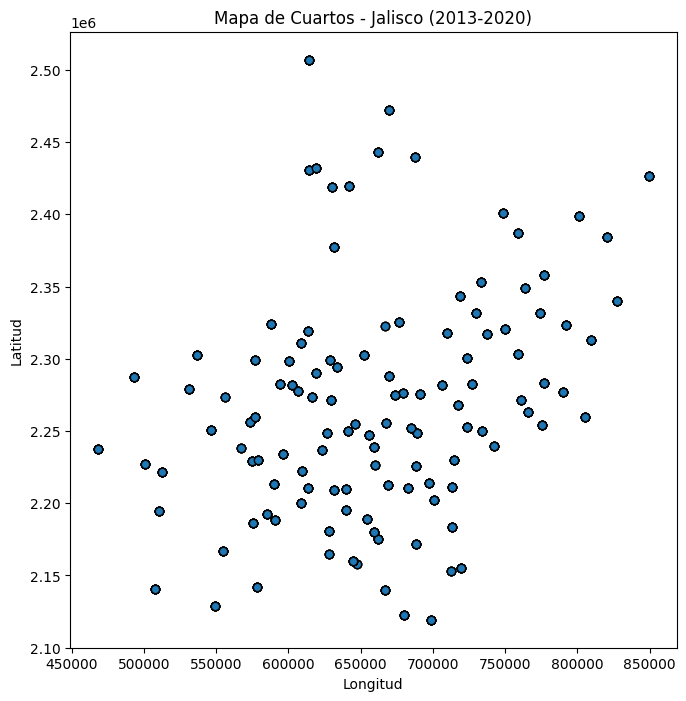

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del shapefile (asegúrate que todos los archivos están en el mismo directorio)
gdf = gpd.read_file("df_cuartos.shp")
jalisco_df = gpd.read_file('D:\ITESO\sem2\prog_analisis\proshecto\limites_municipales\LimiteMunicipal_MGJ2012_modificadoDecreto26837.shp')

# Mostrar las primeras filas
print(gdf.head())

# Visualizar el mapa
gdf.plot(figsize=(10, 8), edgecolor='black',categorical=True,categories=gdf['municipio'])
plt.title("Mapa de Cuartos - Jalisco (2013-2020)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

sns.set_theme(font='Victor Mono',palette='YlGnBu',style='dark')

In [2]:
# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Contar frecuencia de valores únicos en una columna
print(gdf.value_counts())

municipio            total  5 estrella  4 estrella  3 estrella  2 estrella  1 estrella  sin catego  año   region     geometry                      
acatic               66     0           0           0           0           0           66          2017  altos sur  POINT (723611.965 2300309.088)    1
sayula               151    33          59          10          22          18          9           2013  sur        POINT (639576.541 2195268.292)    1
santa maria del oro  11     0           0           0           0           0           11          2018  sureste    POINT (719130.929 2154881.758)    1
                                                                                                    2019  sureste    POINT (719130.929 2154881.758)    1
                                                                                                    2020  sureste    POINT (719130.929 2154881.758)    1
                                                                                       

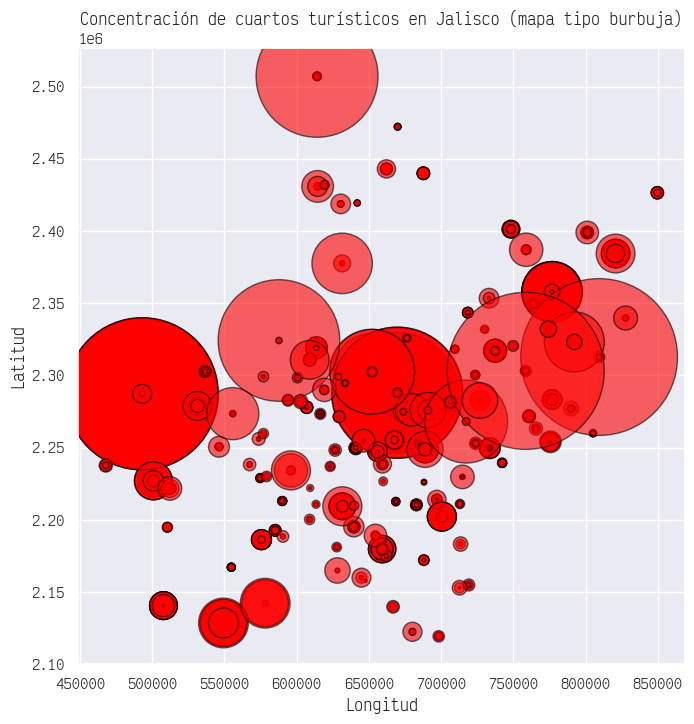

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")
# 
# Convertir columna a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Graficar burbujas
fig, ax = plt.subplots(figsize=(10, 8))

gdf.plot(
    ax=ax,
    color='red',
    markersize=gdf['total'] * 0.5,
    alpha=0.6,
    edgecolor='black'
)

plt.title("Concentración de cuartos turísticos en Jalisco (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


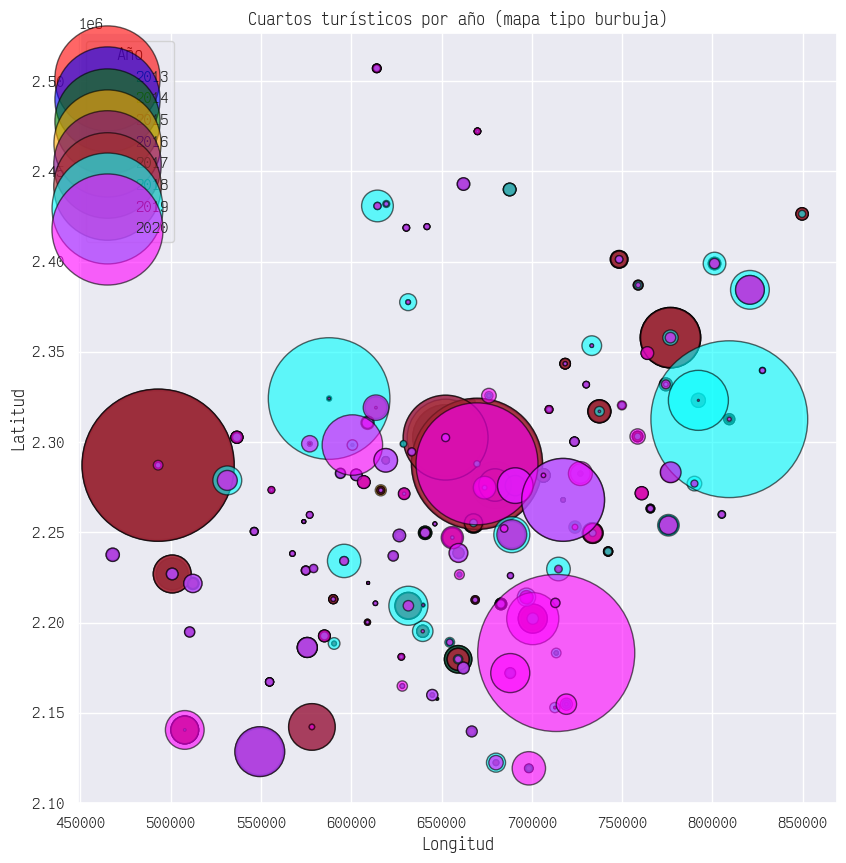

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Crear lista de colores (puedes ampliar si tienes más años)
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
colors = sns.color_palette('Spectral',gdf['region'].nunique())
# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i % len(colores)],
        alpha=0.6,
        label=str(año),
        edgecolor='black'
    )

plt.title("Cuartos turísticos por año (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


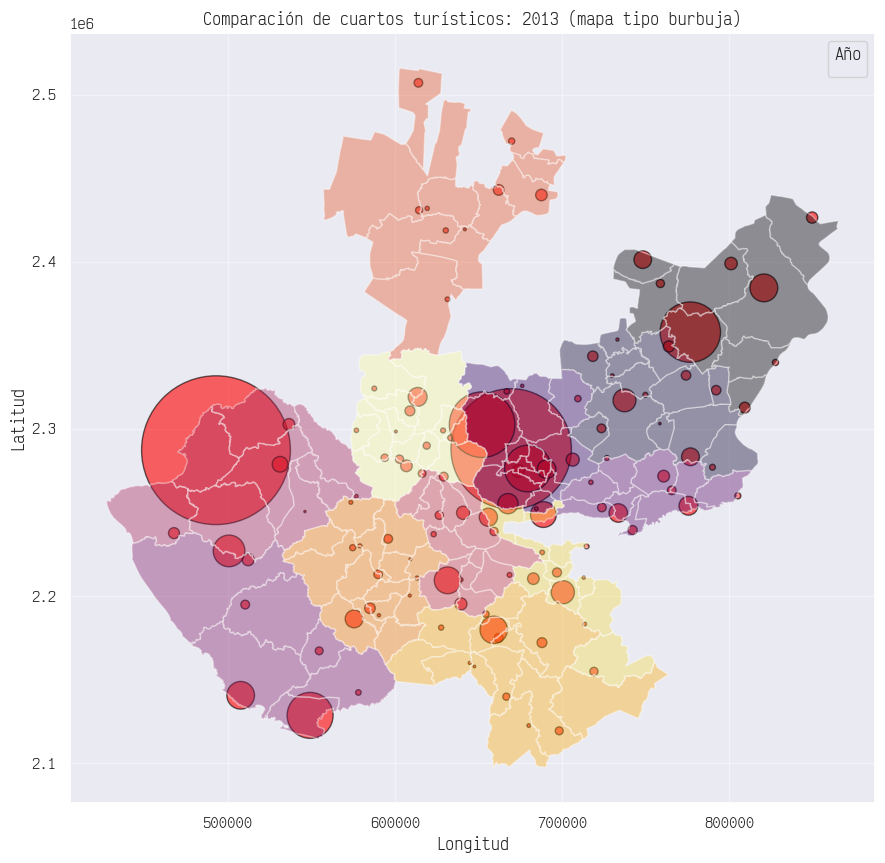

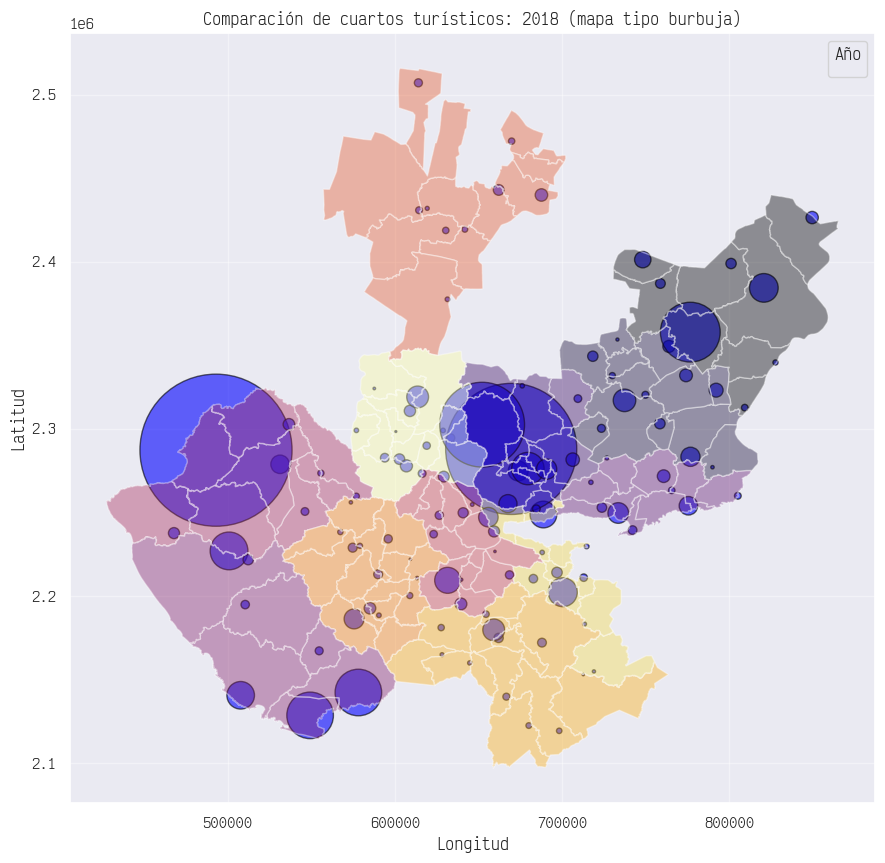

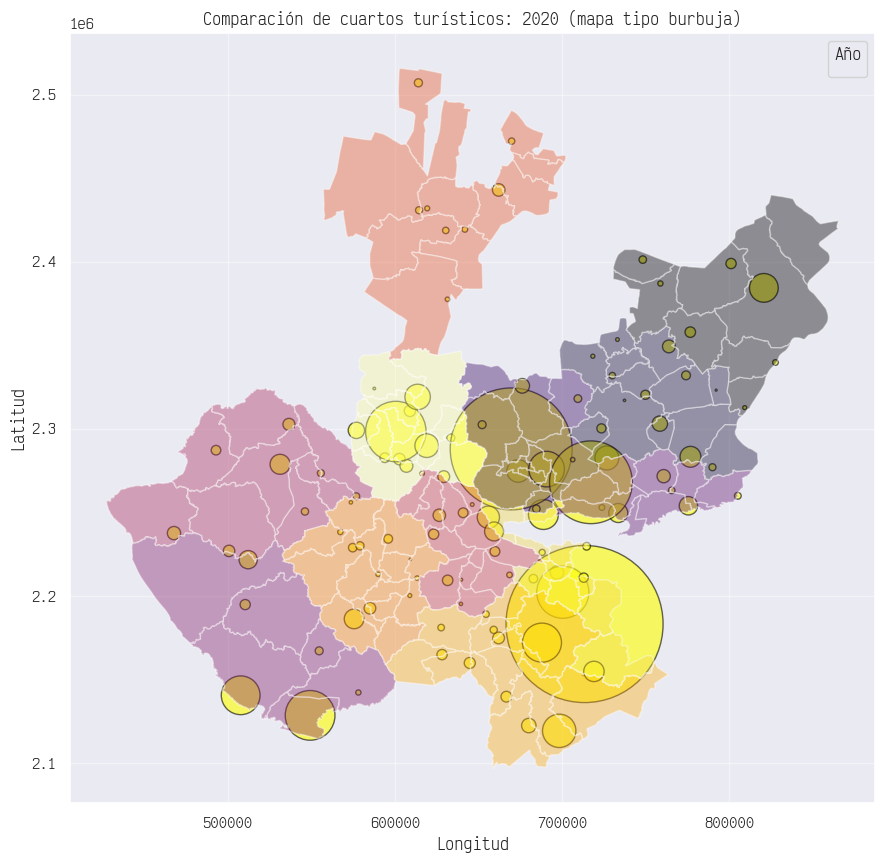

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Filtrar solo los años 2013 y 2020
gdf = gdf[gdf['año'].isin([2013,2017, 2020])]

# Crear figura

# Colores para 2013 y 2020
colores = ['red', 'blue','yellow']
colors = sns.color_palette('inferno',jalisco_df['REGIÓN'].nunique(),as_cmap=True)


# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    fig, ax = plt.subplots(figsize=(12, 10))
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i],
        alpha=0.6,
        edgecolor='black'
    )

    jalisco_df.plot(column='REGIÓN', alpha=.4, ax=ax, legend=True, cmap=colors)

    plt.grid(alpha=.4)
    plt.title(f"Comparación de cuartos turísticos: {año} (mapa tipo burbuja)")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.legend(title="Año")



In [11]:
gdf[gdf['año'] == 2013]['total'].sum()

65677

In [12]:
gdf[gdf['año'] == 2020]['total'].sum()

78187

In [ ]:
gdf[(gdf['municipio'] == 'puerto vallarta')|gdf['año'] == 2020)]['total'].sum()

48544